In [54]:
#Libraries
import tweepy
import mpld3
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [55]:
# Twitter API Credentials
consumerKey = "IJnI3YMhZNlZZRzxjT64N3fzL"
consumerSecret = "zrwUvQSPWy5DKGvH8GKw6ImKMz6GrhP4lA1YrQLP7rxws4h1uc"
accessToken = "2527604575-250QimY8OuFIauWoc2FA5DjazGytJwT4JIPvTzH"
accessTokenSecret = "bWJx4lGW4FwuPMz1feAIKjt35xy5k7My9hFhek5PlhOo9"

In [56]:
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

authenticate.set_access_token(accessToken, accessTokenSecret)

api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [57]:
userID = input("Enter Twitter User name: ")

Enter Twitter User name: BillGates


In [58]:
posts = api.user_timeline(screen_name = userID, count = 100, lang = "en", tweet_mode = "extended")

i=1
for tweet in posts[0:5]:
    print(str(i) + ') ' + tweet.full_text + '\n')
    i = i+1

1) Globally, a lack of medical oxygen–needed to treat pneumonia, malaria, and other diseases–leads to hundreds of thousands of deaths each year. @BernardOlayo founded @Hewa_Tele to address this often-overlooked challenge. https://t.co/TSea0oyDjP

2) This hero is playing a critical role in Kenya’s preparations to tackle COVID-19 by scaling up medical oxygen supplies that will be needed to keep the most critically ill patients alive. https://t.co/U2YcRgzSDA

3) RT @MichelleObama: Here's what #Juneteenth means to me: https://t.co/KlOoYwdzD5

4) RT @NavigatingNikki: “It’s that clarity of language about the VALUE of black life in America that distinguishes #Juneteenth as emancipation…

5) RT @nationalbook: "And I’ll never lose my faith that you and I can create an anti-racist America where racial disparities are nonexistent.…



In [59]:
df = pd.DataFrame( [tweet.full_text for tweet in posts], columns=['Tweets'])

df.head()

,Tweets
0,"Globally, a lack of medical oxygen–needed to t..."
1,This hero is playing a critical role in Kenya’...
2,RT @MichelleObama: Here's what #Juneteenth mea...
3,RT @NavigatingNikki: “It’s that clarity of lan...
4,"RT @nationalbook: ""And I’ll never lose my fait..."


In [60]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+:', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    
    return text

df['Tweets'] = df['Tweets'].apply(cleanTxt)
df

,Tweets
0,"Globally, a lack of medical oxygen–needed to t..."
1,This hero is playing a critical role in Kenya’...
2,Here's what Juneteenth means to me:
3,“It’s that clarity of language about the VALU...
4,"""And I’ll never lose my faith that you and I ..."
...,...
95,It’s encouraging to see these results. Typhoid...
96,Thanks to the work of this father–daughter dyn...
97,Solving the world’s toughest challenges—like f...
98,Progress isn’t always easy to see. These chart...


In [61]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,"Globally, a lack of medical oxygen–needed to t...",0.125000,-0.041667
1,This hero is playing a critical role in Kenya’...,0.540000,0.020000
2,Here's what Juneteenth means to me:,0.000000,0.000000
3,“It’s that clarity of language about the VALU...,0.433333,-0.166667
4,"""And I’ll never lose my faith that you and I ...",0.000000,0.000000
...,...,...,...
95,It’s encouraging to see these results. Typhoid...,0.733333,-0.100000
96,Thanks to the work of this father–daughter dyn...,0.247917,0.175000
97,Solving the world’s toughest challenges—like f...,0.809091,0.206061
98,Progress isn’t always easy to see. These chart...,0.666667,0.466667


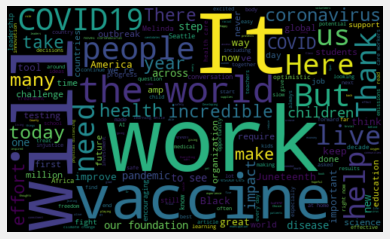

In [72]:
allWords = ' '.join( [twts for twts in df['Tweets']] )
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation= "bilinear")
plt.axis('off')
fig1 = plt.gcf()
plt.show()
html_str1 = mpld3.fig_to_html(fig1)

In [27]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

df

,Tweets,Subjectivity,Polarity,Analysis
0,"Globally, a lack of medical oxygen–needed to t...",0.125000,-0.041667,Negative
1,This hero is playing a critical role in Kenya’...,0.540000,0.020000,Positive
2,Here's what Juneteenth means to me:,0.000000,0.000000,Neutral
3,“It’s that clarity of language about the VALU...,0.433333,-0.166667,Negative
4,"""And I’ll never lose my faith that you and I ...",0.000000,0.000000,Neutral
...,...,...,...,...
95,It’s encouraging to see these results. Typhoid...,0.733333,-0.100000,Negative
96,Thanks to the work of this father–daughter dyn...,0.247917,0.175000,Positive
97,Solving the world’s toughest challenges—like f...,0.809091,0.206061,Positive
98,Progress isn’t always easy to see. These chart...,0.666667,0.466667,Positive


In [28]:
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ') ' + sortedDF['Tweets'][i])
        print()
        j = j+1
        

1) This hero is playing a critical role in Kenya’s preparations to tackle COVID-19 by scaling up medical oxygen supplies that will be needed to keep the most critically ill patients alive. 

2)  Happy Juneteenth fam! My latest for the . Find joy today! The images from the article alone are giving me l…

3)  Proud to share my thoughts in ’s “injustice issue” on (and for) our beloved young people I call the TrayvonGene…

4)  Opal is 93 years old and a great interview. Take a listen 

5) I am committed to listening and learning more about systemic racism and what I can do with my actions and words to help create a more equal and just future. Black lives matter.

6)  Today world leaders pledged to fully support ’s mission to give more children access to lifesaving vaccines and b…

7) I continue to be inspired by all of the volunteers (including many retired health care workers and teachers) on the front lines of the fight against coronavirus each day. 

8) Here are five books to read this 

In [30]:
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') ' + sortedDF['Tweets'][i])
        print()
        j = j+1

1) Globally, a lack of medical oxygen–needed to treat pneumonia, malaria, and other diseases–leads to hundreds of thousands of deaths each year.  founded _Tele to address this often-overlooked challenge. 

2)  “It’s that clarity of language about the VALUE of black life in America that distinguishes Juneteenth as emancipation…

3)  “Only those feigning blindness fail to see the body of work we are, and the work of body we have done. 

Everything is what it is…

4)  Juneteenth recognizes &amp; celebrates Black people’s freedom and the end of slavery in the US!  19 Jun 1865 Union Army Genera…

5) RT _Nyongo: 1. This is Opal Lee, the force behind the movement to make Juneteenth a national holiday. Also known as Freedom Day, it…

6) …in policing, criminal justice, education, health care, housing, the workplace and all other areas of their lives.

7) The horrifying killings of George Floyd, Ahmaud Arbery, Breonna Taylor and far too many other Black people—and the protests they sparked—are s

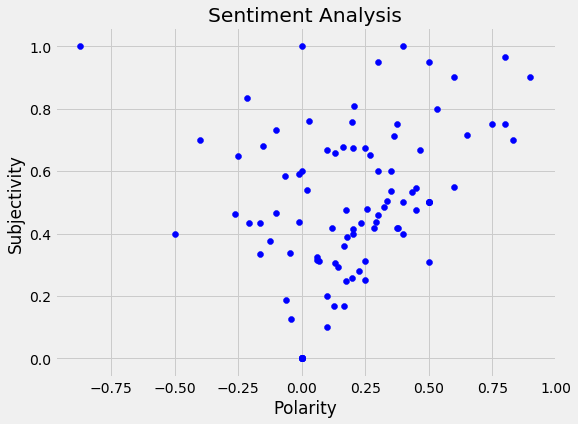

In [32]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [48]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
pper = round((ptweets.shape[0]/df.shape[0])*100, 1)

In [49]:
print(pper)

68.0


In [36]:
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
nper = round((ntweets.shape[0]/df.shape[0])*100, 1)

19.0

In [37]:
neutweets = df[df.Analysis == 'Neutral']
neutweets = neutweets['Tweets']
neper = round((neutweets.shape[0]/df.shape[0])*100, 1)


13.0

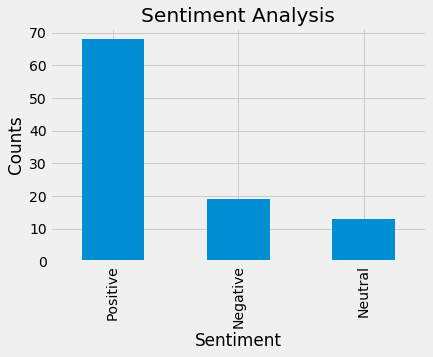

In [40]:
df['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

In [46]:
q, w, e = df['Analysis'].value_counts()

In [47]:
print(q)

68


In [ ]:
print(w)

In [50]:
import os

In [53]:
os.rmdir('static/rem/')